In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Initials

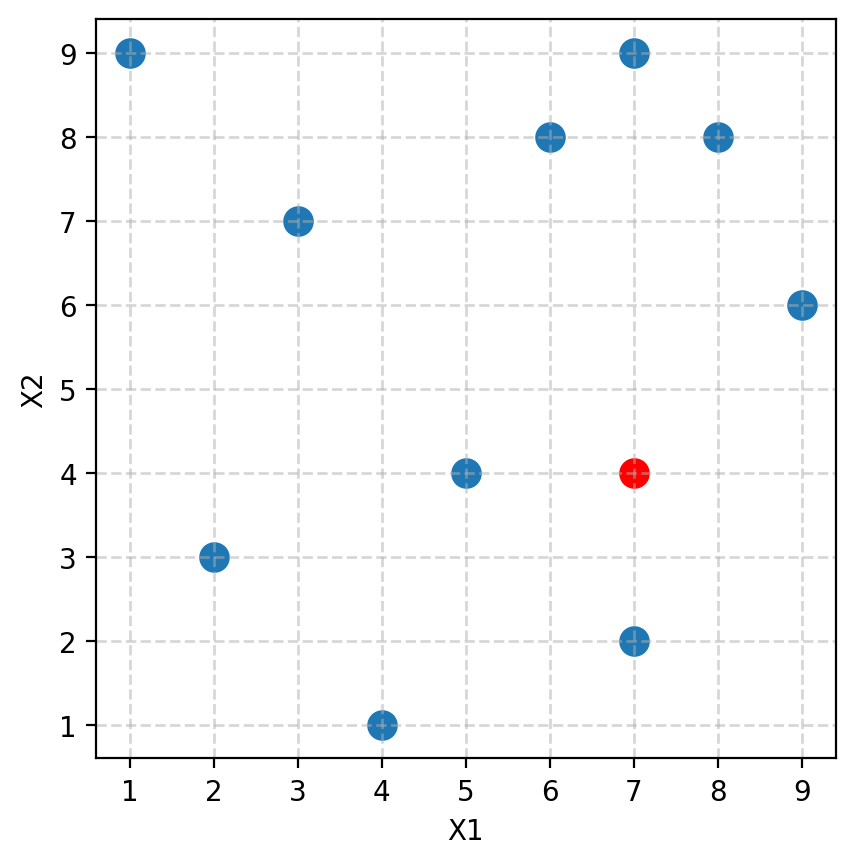

In [107]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)
    

plot_dataset()

In [6]:
from sklearn.neighbors import NearestNeighbors

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors([query_pt])

X[indices], distances

(array([[[5, 4],
         [7, 2]]]),
 array([[2., 2.]]))

In [7]:
def pairwise_dist(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.linalg.norm(x - y)

In [8]:
def distance_vector_(X: np.ndarray, query_pt: np.ndarray):
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    n, d = X.shape
    distances = np.zeros(n)
    for i in range(n):
        distances[i] = pairwise_dist(X[i], query_pt)
    #output the nearest point
    minimum_distance = np.min(distances)
    min_array = []
    for i in range(n):
        if distances[i] == minimum_distance:
            min_array.append(X[i])
    return min_array, sorted(distances)

In [22]:
def distance_vector(X: np.ndarray, query_pt: np.ndarray):
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    # Calculate distances using vectorized operations
    distances = np.linalg.norm(X - query_pt, axis=1)
    
    # Find minimum distance and corresponding points
    min_distance = np.min(distances)
    min_indices = np.where(distances == min_distance)[0]
    min_points = X[min_indices]
    
    return min_points, distances

In [23]:
# Test that the function is correct by comparing to sklearn
min_array, distances_naive = distance_vector(X, query_pt)
print(min_array)
print(type(min_array))

[[5 4]
 [7 2]]
<class 'numpy.ndarray'>


In [27]:
# Find all distances from query_pt to all points in X using sklearn
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
print(distances_sklearn == np.sort(distances_naive))

[[ True  True  True  True  True  True  True  True  True  True]]


# Naive KNN

In [141]:
def naive_KNN(X: np.ndarray, query_pt: np.ndarray, k = 1, Y = None):

    '''
    X is training data                           : (n,d)
    query_pt is new point from test data         : (d,)
    Y stores the class values corresponding to X : (n,)  : for classification (optional)
    k is the number of nearest neighbors to consider
    '''

    # print(query_pt.ndim)
    # print(X.ndim)

    # if query_pt.ndim == 1:
    #     query_pt = query_pt.reshape(1, -1)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # print(X.shape, query_pt.shape)
    # print(Y.shape if Y is not None else None)
    # print(X.shape[1]==query_pt.shape[0])
    # print(X.shape[0]==Y.shape[0] if Y is not None else None)

    # assert X.shape[1] == query_pt.shape[0] and (X.shape[0] == Y.shape[0] if Y is not None else True)

    distances = np.linalg.norm(X - query_pt, axis=1)

    sorted_indices = np.argsort(distances)
    # print(sorted_indices)
    k_nearest = sorted_indices[:k]
    # print(k_nearest)

    if Y is not None:
        k_nearest_classes = Y[k_nearest]
        counts = np.bincount(k_nearest_classes)
        # print(counts)
        predicted_class = np.argmax(counts)
        return k_nearest, X[k_nearest], distances[k_nearest], predicted_class
    else:
        return k_nearest, X[k_nearest], distances[k_nearest]

In [66]:
import numpy as np
X = np.array([1,2,3,5,6,7])
Y = np.array([1,0,1,1,0,1])

naive_KNN(X, np.array([4.000000000000000001]), 1, Y)

(array([2], dtype=int64), array([[3]]), array([1.]), 1)

In [67]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])
naive_KNN(X, np.array([7, 4]), 1)

(array([4], dtype=int64), array([[5, 4]]), array([2.]))

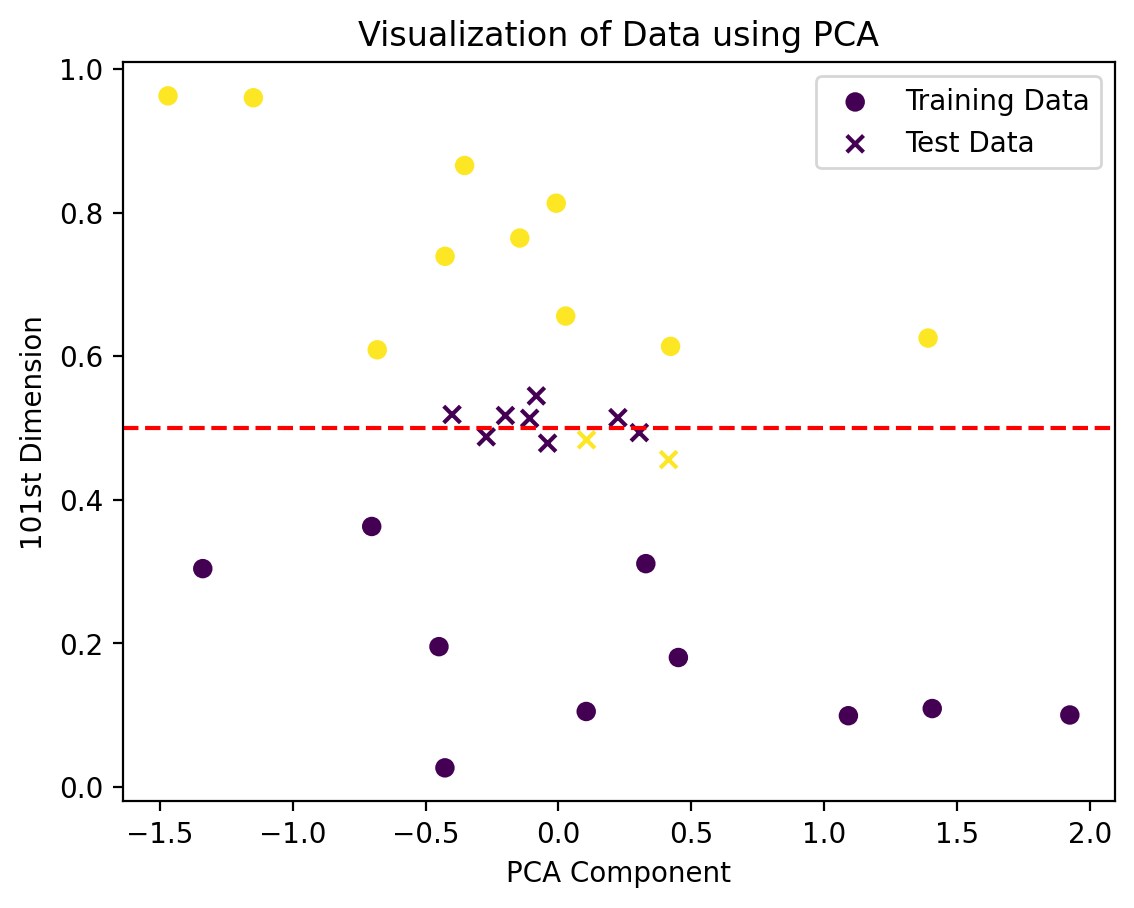

In [95]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Set seed for reproducibility
np.random.seed(42)

# Create the training data
X_train = np.random.rand(20, 100)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 10), np.random.uniform(0.6, 1, 10)])
y_train = np.concatenate([np.ones(10), 2*np.ones(10)])

# Create the test data
X_test = np.random.rand(10, 100)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:, :-1], y_train)  # Excluding the final dimension
y_train_pred = knn.predict(X_train[:, :-1])  # Excluding the final dimension
y_test_pred = knn.predict(X_test[:, :-1])  # Excluding the final dimension

# Perform PCA on the training data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train[:, :-1])  # Excluding the final dimension
X_test_pca = pca.transform(X_test[:, :-1])  # Excluding the final dimension

# Plot the data
plt.scatter(X_train_pca, X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test_pca, X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('PCA Component')
plt.ylabel('101st Dimension')
plt.title('Visualization of Data using PCA')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# Reset the random seed to avoid affecting other parts of the code
np.random.seed()

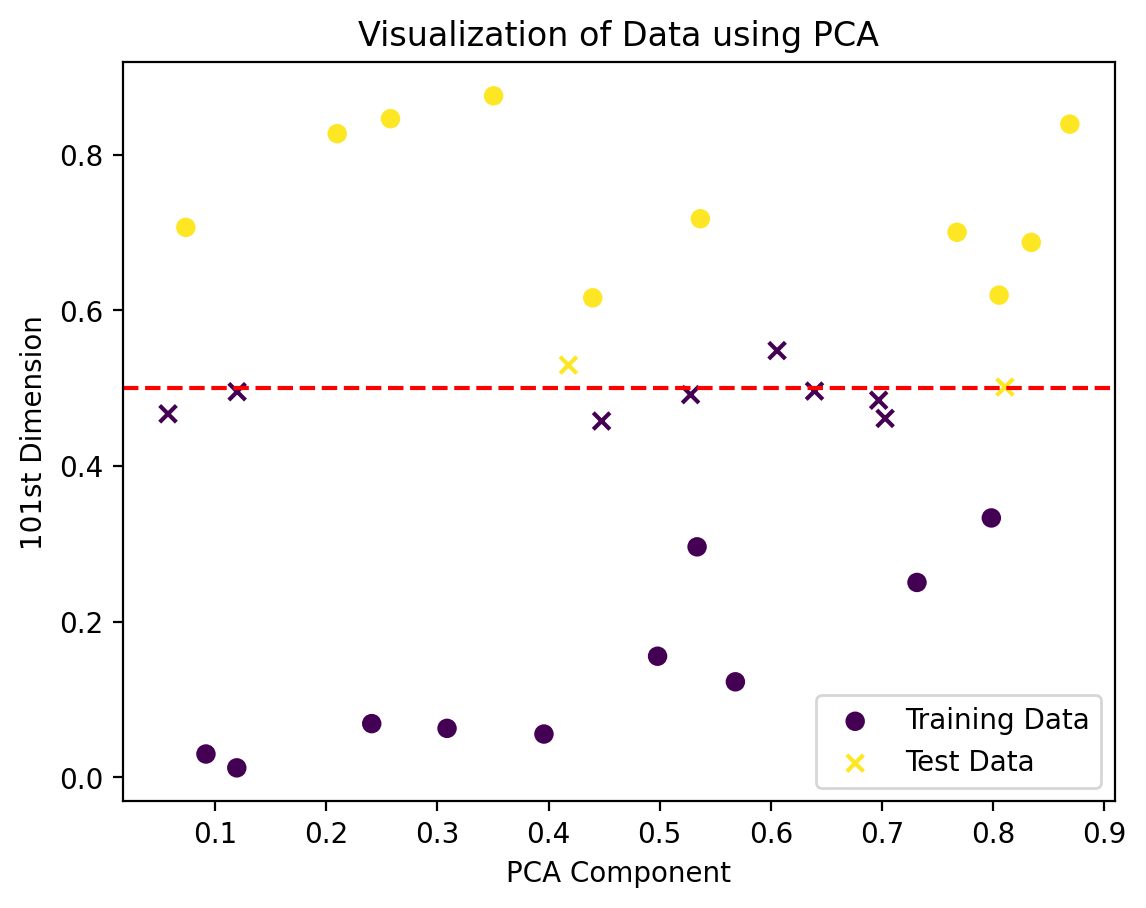

In [85]:
# Create the training data
X_train = np.random.rand(20, 2)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 10), np.random.uniform(0.6, 1, 10)])
y_train = np.concatenate([np.ones(10), 2*np.ones(10)])

# Create the test data
X_test = np.random.rand(10, 2)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:, :-1], y_train)  # Excluding the final dimension
y_train_pred = knn.predict(X_train[:, :-1])  # Excluding the final dimension
y_test_pred = knn.predict(X_test[:, :-1])  # Excluding the final dimension

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Visualization of 2d-Data')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# KD - Tree

In [20]:
class Node:
    def __init__(self, point, axis, left=None, right=None):
        self.point = point
        self.axis = axis
        self.left = left
        self.right = right

In [18]:
class KD_tree_:
    def __init__(self, points, classes, k, leaf_size = None, max_depth = None):

        assert points.shape[0] > k

        self.k = k
        self.min_points = leaf_size
        self.max_depth = max_depth

        self.X = points
        self.Y = classes

        self.root = self.__build_kdtree(points)

    def __build_kdtree(self, points, depth=0, axes = None):

        if depth == 0:
            # print(points.shape)
            dim = points.shape[1]
            if self.max_depth is None:
                self.max_depth = dim
            else:
                self.max_depth = min(dim, self.max_depth)

            if self.min_points is None:
                self.min_points = self.k
            else:
                self.min_points = max(self.k, self.min_points)

            axes = list(range(points.shape[1]))

            # print(self.min_points)
            # print(self.max_depth)
            # print()

        if len(points) == 0:
            return None
        
        if depth == self.max_depth:
            return Node(
                point = None,
                axis  = None,
                left  = None,
                right = None
            )

        for p_axis in axes:

            sorted_points = sorted(points, key=lambda x: x[p_axis])
            median_value = self.__calculate_median(sorted_points, p_axis)

            print("Depth:", depth, "Median:", median_value, "Axis:", p_axis)

            left_points = [point for point in sorted_points if point[p_axis] < median_value]
            right_points = [point for point in sorted_points if point[p_axis] >= median_value]

            if len(left_points) < self.min_points or len(right_points) < self.min_points:
                continue

            # print(depth)
            # print(left_points)
            # print(right_points)
            # print()

            child_axes = axes.copy()
            child_axes.remove(p_axis)

            return Node(
                point = median_value,
                axis  = p_axis,
                left  = self.__build_kdtree(left_points, depth + 1, axes=child_axes),
                right = self.__build_kdtree(right_points, depth + 1, axes=child_axes)
            )
        
        return Node(
            point = None,
            axis  = None,
            left  = None,
            right = None
        )

    def __calculate_median(self, sorted_points, axis):
        n = len(sorted_points)
        if n % 2 == 0:
            return (sorted_points[n // 2 - 1][axis] + sorted_points[n // 2][axis]) / 2
        else:
            return sorted_points[n // 2][axis]
        
    def get_nearest_neighbours(self, query_point):

        assert self.X.shape[1] == query_point.shape[0]

        def traverse_tree(node, subset_X, subset_Y):
            if node is None or node.point is None:
                return subset_X, subset_Y

            if query_point[node.axis] < node.point:
                return traverse_tree(node.left, subset_X[subset_X[:, node.axis] < node.point], subset_Y[subset_X[:, node.axis] < node.point])
            else:
                return traverse_tree(node.right, subset_X[subset_X[:, node.axis] >= node.point], subset_Y[subset_X[:, node.axis] >= node.point])

        subset_X, subset_Y = traverse_tree(self.root, self.X.copy(), self.Y.copy())
        return subset_X, subset_Y
    
    def predict_class(self, query_point):
        _ , nearest_classes = self.get_nearest_neighbours(query_point)

        assert len(nearest_classes) != 0

        unique_classes, class_counts = np.unique(nearest_classes, return_counts=True)
        max_count_idx = np.argmax(class_counts)
        return unique_classes[max_count_idx]

In [4]:
def shift_array_(arr, chosen_element):
    # Find the index of the chosen element
    index = np.where(arr == chosen_element)[0][0]
    
    # Shift the elements
    shifted_arr = np.roll(arr, -index-1)
    
    return shifted_arr

def shift_array(arr, chosen_element):
    # Find the index of the chosen element
    index = np.where(arr == chosen_element)[0][0]
    
    # Reverse the first part of the array
    arr[:index+1] = arr[:index+1][::-1]
    
    # Reverse the second part of the array
    arr[index+1:] = arr[index+1:][::-1]
    
    # Reverse the entire array
    arr[:] = arr[::-1]
    
    '''return arr'''

a = np.array([1, 2, 3, 4, 5])
b = shift_array(a, 3)
a , b

(array([4, 5, 1, 2, 3]), array([4, 5, 1, 2, 3]))

In [12]:
np.where(a == 3)

(array([4], dtype=int64),)

In [8]:
c = np.array([3, 2, 3, 4, 5])
np.where(c == 3)

(array([0, 2], dtype=int64),)

In [165]:
class KD_tree:
    def __init__(self, points, classes, k, leaf_size = None, max_depth = None):

        assert points.shape[0] > k

        self.k = k
        self.min_points = leaf_size
        self.max_depth = max_depth

        self.X = points
        self.Y = classes

        self.root = self.__build_kdtree(points)

    def __build_kdtree(self, points, depth=0, axes = None):

        if depth == 0:
            # print(points.shape)
            # dim = points.shape[1]
            N = points.shape[0]
            if self.max_depth is None:
                self.max_depth = N - self.k
            else:
                self.max_depth = min(N - self.k, self.max_depth)

            if self.min_points is None:
                self.min_points = self.k
            else:
                self.min_points = max(self.k, self.min_points)

            axes = np.array(range(points.shape[1]))

            # print(self.min_points)
            # print(self.max_depth)
            # print()

        if len(points) == 0:
            return None
        
        if depth == self.max_depth:
            return None

        for p_axis in axes:

            sorted_points = sorted(points, key=lambda x: x[p_axis])
            median_value = self.__calculate_median(sorted_points, p_axis)

            left_points = [point for point in sorted_points if point[p_axis] < median_value]
            right_points = [point for point in sorted_points if point[p_axis] >= median_value]

            if len(left_points) < self.min_points or len(right_points) < self.min_points:
                continue

            # print(depth)
            # print(left_points)
            # print(right_points)
            # print()
            
            # print(axes, p_axis)
            shift_array(axes, p_axis)

            # print("Depth:", depth, "Median:", median_value, "Axis:", p_axis)

            return Node(
                point = median_value,
                axis  = p_axis,
                left  = self.__build_kdtree(left_points, depth + 1, axes=axes),
                right = self.__build_kdtree(right_points, depth + 1, axes=axes)
            )
        
        # print(f"Depth: {depth} - No Split Possible")
        return None

    def __calculate_median(self, sorted_points, axis):
        n = len(sorted_points)
        if n % 2 == 0:
            return (sorted_points[n // 2 - 1][axis] + sorted_points[n // 2][axis]) / 2
        else:
            return sorted_points[n // 2][axis]
        
    def get_nearest_neighbours(self, query_point):

        assert self.X.shape[1] == query_point.shape[0]

        def traverse_tree(node, subset_X, subset_Y):
            if node is None or node.point is None:
                return subset_X, subset_Y

            if query_point[node.axis] < node.point:
                return traverse_tree(node.left, subset_X[subset_X[:, node.axis] < node.point], subset_Y[subset_X[:, node.axis] < node.point])
            else:
                return traverse_tree(node.right, subset_X[subset_X[:, node.axis] >= node.point], subset_Y[subset_X[:, node.axis] >= node.point])

        subset_X, subset_Y = traverse_tree(self.root, self.X.copy(), self.Y.copy())
        return subset_X, subset_Y
    
    def get_k_nearest_neighbours(self, query_point):
        subset_X, subset_Y = self.get_nearest_neighbours(query_point)

        if len(subset_X) <= self.k:
            return subset_X, subset_Y
        
        distances = np.linalg.norm(subset_X - query_point, axis=1)
        sorted_indices = np.argsort(distances)
        k_nearest = sorted_indices[:self.k]

        return subset_X[k_nearest], subset_Y[k_nearest]        
    
    def predict_class(self, query_point):
        _ , nearest_k_classes = self.get_k_nearest_neighbours(query_point)

        assert len(nearest_k_classes) != 0

        unique_classes, class_counts = np.unique(nearest_k_classes, return_counts=True)
        max_count_idx = np.argmax(class_counts)
        return unique_classes[max_count_idx]

### some testing

In [113]:
a = KD_tree_(X,1)
a.__calculate_median__

(10, 2)


<bound method KD_tree.__calculate_median__ of <__main__.KD_tree object at 0x000001278ECA9000>>

In [117]:
b = KD_tree_(X,1)
b.__build_kdtree

(10, 2)


AttributeError: 'KD_tree' object has no attribute '__build_kdtree'

In [147]:
X = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15], [7,12,14]])
Y = np.array([1,1,0,0,1,0])
q = np.array([2,5,7])

X.shape , Y.shape , q.shape

((6, 3), (6,), (3,))

In [164]:
d = KD_tree_(X,Y,1)

2
3

0
[array([1, 2, 3]), array([4, 5, 6])]
[array([7, 8, 9]), array([ 7, 12, 14]), array([10, 11, 12]), array([13, 14, 15])]

1
[array([7, 8, 9]), array([10, 11, 12])]
[array([ 7, 12, 14]), array([13, 14, 15])]



In [144]:
q = np.array([2,5])
d.get_nearest_neighbours(q)

AssertionError: 

In [165]:
q = np.array([2,5,7])
d.get_nearest_neighbours(q)

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([1, 1]))

In [166]:
d.predict_class(q)

1

In [168]:
q = np.array([8,5,2])
d.get_nearest_neighbours(q)

(array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([0, 0]))

In [169]:
d.predict_class(q)

0

In [177]:
np.random.seed(31)

X_train = np.random.rand(20, 100)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 10), np.random.uniform(0.6, 1, 10)])
y_train = np.concatenate([np.ones(10), 2*np.ones(10)])

X_test = np.random.rand(10, 100)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

KD = KD_tree_(X_train, y_train, 3)
print("Trained!")

y_test_pred = []
for x in X_test:
    # print("\nx = ", x)
    # print(KD.get_nearest_neighbours(x))
    # print(KD.predict_class(x))
    y_test_pred.append(KD.predict_class(x))

y_test_pred

Trained!


[2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0]

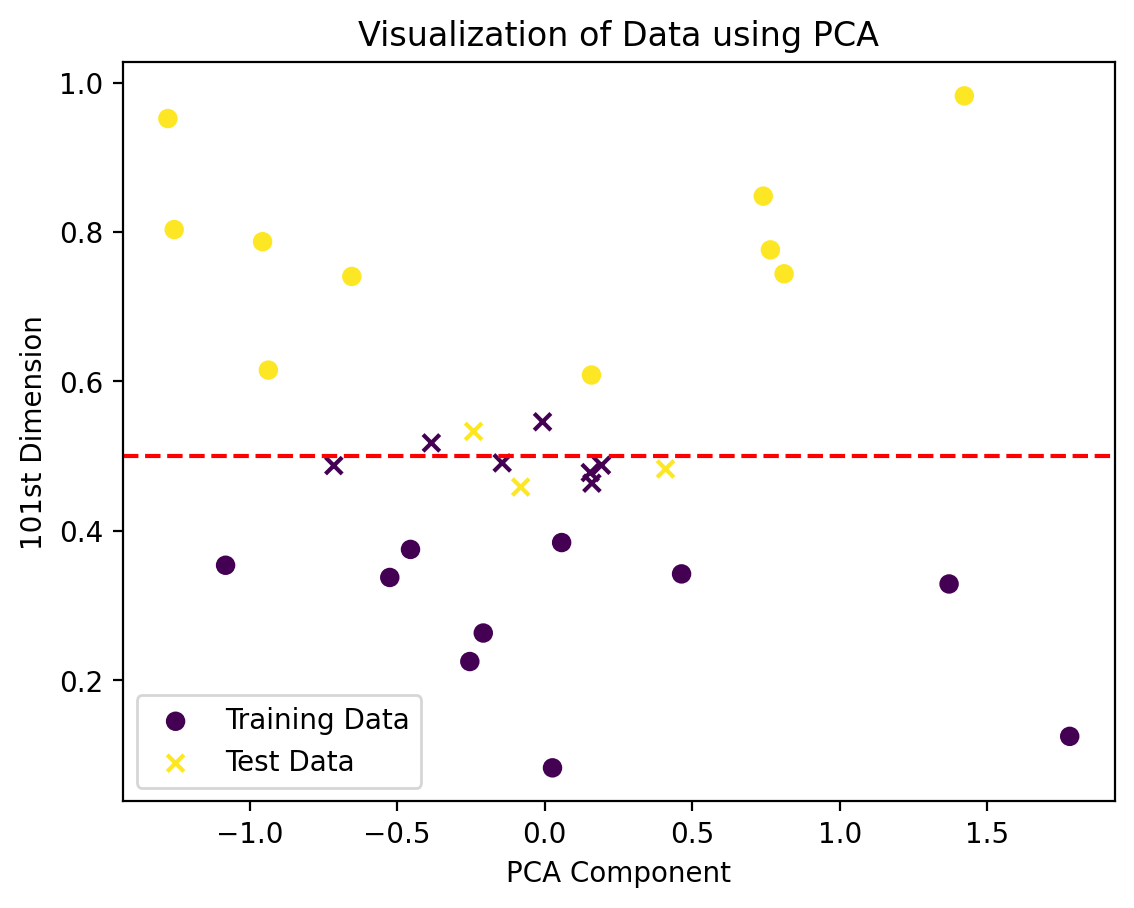

In [178]:
# Perform PCA on the training data
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train[:, :-1])  # Excluding the final dimension
X_test_pca = pca.transform(X_test[:, :-1])  # Excluding the final dimension

# Plot the data
plt.scatter(X_train_pca, X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test_pca, X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('PCA Component')
plt.ylabel('101st Dimension')
plt.title('Visualization of Data using PCA')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend()
plt.show()

# Reset the random seed to avoid affecting other parts of the code
np.random.seed()

Depth: 0 Median: 0.5850246183373644 Axis: 0
Depth: 1 Median: 0.6180645026887948 Axis: 1
Depth: 1 Median: 0.3718870400708373 Axis: 1
Trained!

x =  [0.55391611 0.474306  ]
(array([[0.30793495, 0.10858028],
       [0.26950525, 0.10710084],
       [0.17974525, 0.18453253],
       [0.2827656 , 0.28023873],
       [0.26969294, 0.18156382],
       [0.56817485, 0.02460656],
       [0.29564241, 0.10281131],
       [0.27699727, 0.04148372],
       [0.56991727, 0.33354278],
       [0.0967189 , 0.60201772]]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]))

x =  [0.57356825 0.54386296]
(array([[0.30793495, 0.10858028],
       [0.26950525, 0.10710084],
       [0.17974525, 0.18453253],
       [0.2827656 , 0.28023873],
       [0.26969294, 0.18156382],
       [0.56817485, 0.02460656],
       [0.29564241, 0.10281131],
       [0.27699727, 0.04148372],
       [0.56991727, 0.33354278],
       [0.0967189 , 0.60201772]]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]))

x =  [0.98807864 0.48701297]
(arra

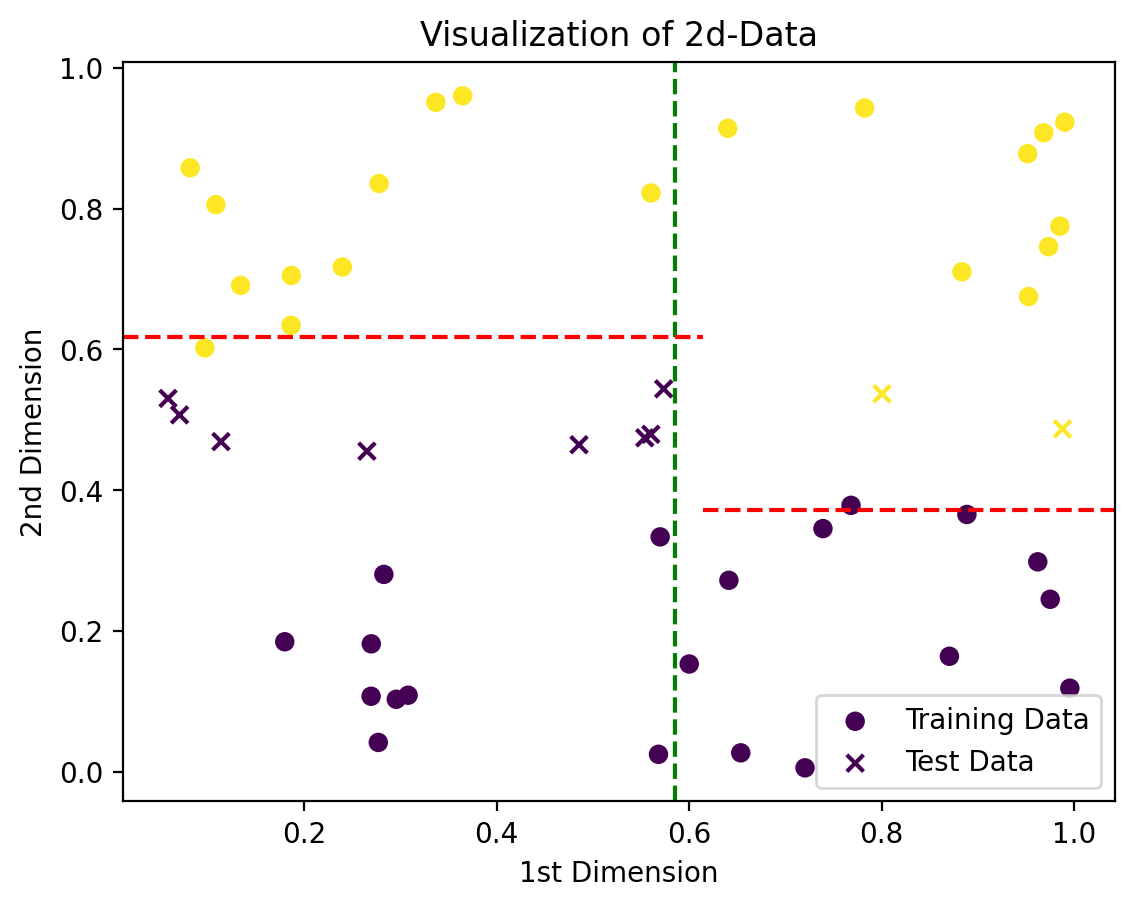

In [204]:
np.random.seed(26)

# Create the training data
X_train = np.random.rand(40, 2)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 20), np.random.uniform(0.6, 1, 20)])
y_train = np.concatenate([np.ones(20), 2*np.ones(20)])

# Create the test data
X_test = np.random.rand(10, 2)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
KD = KD_tree_(X_train, y_train, 3)
print("Trained!")

y_test_pred = []
for x in X_test:
    print("\nx = ", x)
    print(KD.get_nearest_neighbours(x))
    y_test_pred.append(KD.predict_class(x))

print(y_test_pred)

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Visualization of 2d-Data')
# plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0.5850246183373644, color='g', linestyle='--')
plt.axhline(y=0.6180645026887948, xmin=0, xmax=0.5850246183373644, color='r', linestyle='--')
plt.axhline(y=0.3718870400708373, xmin=0.5850246183373644, xmax=1, color='r', linestyle='--')
plt.legend()
plt.show()

np.random.seed()

In [203]:
def cal_median(sorted_points, axis):
    n = len(sorted_points)
    if n % 2 == 0:
        return (sorted_points[n // 2 - 1][axis] + sorted_points[n // 2][axis]) / 2
    else:
        return sorted_points[n // 2][axis]

sorted_points = sorted(X_train, key=lambda x: x[0])
median_value = cal_median(sorted_points, 0)

left_points = [point for point in sorted_points if point[0] < median_value]
right_points = [point for point in sorted_points if point[0] >= median_value]

sorted_points_1 = sorted(left_points, key=lambda x: x[1])
median_value_1 = cal_median(sorted_points_1, 1)

sorted_points_2 = sorted(right_points, key=lambda x: x[1])
median_value_2 = cal_median(sorted_points_2, 1)

median_value , median_value_1 , median_value_2

(0.5850246183373644, 0.6180645026887948, 0.3718870400708373)

### some more testing

In [38]:
X = np.array([[1,2,3], [4,5,6], [5,4,6], [7,8,9], [10,11,12], [13,14,15], [7,12,14], [3,4,5], [6,7,8], [9,10,11], [12,13,14]])
Y = np.array([1,1,0,0,0,1,0,1,0,1,0])
q = np.array([2,5,7])

d = KD_tree(X,Y,2)

Depth: 0 Median: 7 Axis: 0
Depth: 1 Median: 6 Axis: 2
Depth: 2 - No Split Possible
Depth: 2 - No Split Possible
Depth: 1 Median: 9.5 Axis: 0
Depth: 2 - No Split Possible
Depth: 2 - No Split Possible


In [39]:
d.get_nearest_neighbours(q)

(array([[4, 5, 6],
        [5, 4, 6],
        [6, 7, 8]]),
 array([1, 0, 0]))

In [40]:
d.get_k_nearest_neighbours(q)

(array([[4, 5, 6],
        [5, 4, 6]]),
 array([1, 0]))

In [41]:
d.predict_class(q)

0

Depth: 0 Median: 0.5850246183373644 Axis: 0
Depth: 1 Median: 0.6180645026887948 Axis: 1
Depth: 2 Median: 0.2798814362946301 Axis: 0
Depth: 3 - No Split Possible
Depth: 3 - No Split Possible
Depth: 2 Median: 0.8138968731092477 Axis: 1
Depth: 3 - No Split Possible
Depth: 3 - No Split Possible
Depth: 1 Median: 0.8861430607726948 Axis: 0
Depth: 2 Median: 0.3085947250349037 Axis: 1
Depth: 3 - No Split Possible
Depth: 3 - No Split Possible
Depth: 2 Median: 0.9711441298385994 Axis: 0
Depth: 3 - No Split Possible
Depth: 3 - No Split Possible
Trained!

x =  [0.55391611 0.474306  ]
(array([[0.30793495, 0.10858028],
       [0.2827656 , 0.28023873],
       [0.56817485, 0.02460656],
       [0.29564241, 0.10281131],
       [0.56991727, 0.33354278]]), array([1., 1., 1., 1., 1.]))

x =  [0.57356825 0.54386296]
(array([[0.30793495, 0.10858028],
       [0.2827656 , 0.28023873],
       [0.56817485, 0.02460656],
       [0.29564241, 0.10281131],
       [0.56991727, 0.33354278]]), array([1., 1., 1., 1., 1.]

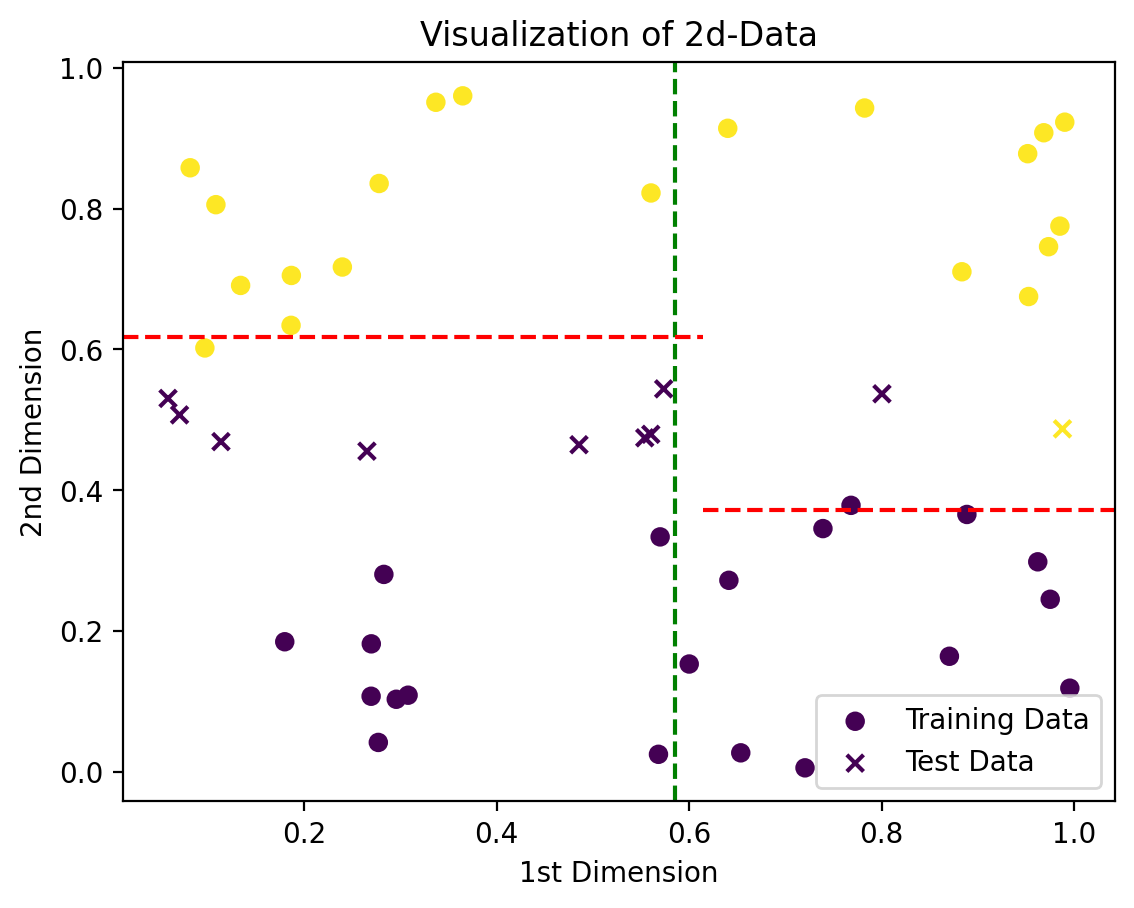

In [44]:
np.random.seed(26)

# Create the training data
X_train = np.random.rand(40, 2)
X_train[:, -1] = np.concatenate([np.random.uniform(0, 0.4, 20), np.random.uniform(0.6, 1, 20)])
y_train = np.concatenate([np.ones(20), 2*np.ones(20)])

# Create the test data
X_test = np.random.rand(10, 2)
X_test[:, -1] = np.random.uniform(0.45, 0.55, 10)

# Perform kNN classification
KD = KD_tree(X_train, y_train, 3)
print("Trained!")

y_test_pred = []
for x in X_test:
    print("\nx = ", x)
    print(KD.get_nearest_neighbours(x))
    y_test_pred.append(KD.predict_class(x))

print(y_test_pred)

# Plot the data
plt.scatter(X_train[:, 0], X_train[:, -1], c=y_train, cmap='viridis', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, -1], c=y_test_pred, cmap='viridis', marker='x', label='Test Data')
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title('Visualization of 2d-Data')
# plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0.5850246183373644, color='g', linestyle='--')
plt.axhline(y=0.6180645026887948, xmin=0, xmax=0.5850246183373644, color='r', linestyle='--')
plt.axhline(y=0.3718870400708373, xmin=0.5850246183373644, xmax=1, color='r', linestyle='--')
plt.legend()
plt.show()

np.random.seed()

# LSH

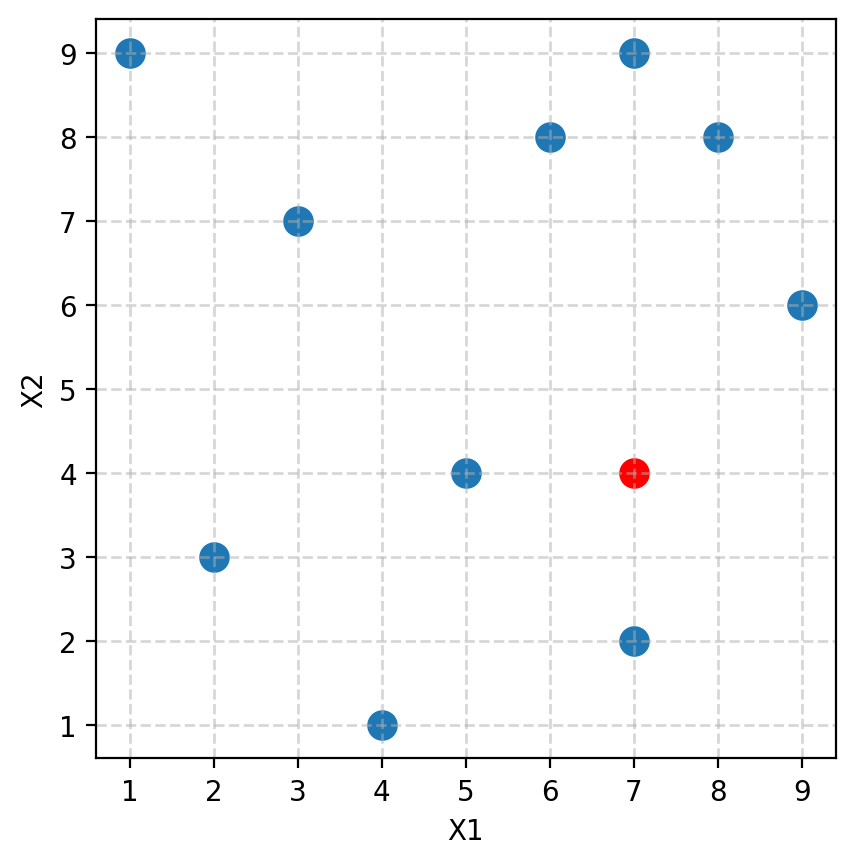

In [130]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)
    
plot_dataset()

In [127]:
def generate_hyperplanes(X):
      # Initialize hyperplanes array
    d = X.shape[1]
    n = min(int(np.log2(X.shape[0])),d*2)
    k = X.shape[0]/5
    hyperplanes = np.zeros((n, d + 1))
    t=0
    max_iterations = 1000

    for i in range(n):
        z=0
        
        iterations=0
        while iterations<max_iterations:
            if (i%2==0):
                z=1
                a = np.random.uniform(0, 2, size=(1, d))
            else:
                a = np.random.uniform(-1, 1, size=(1, d))
                z=0
            a=a.reshape(d,)
            b=np.random.normal()
            counter1=0
            counter2=0
            for j in X:
                c=np.dot(j, a)+b
                if c>=0:
                    counter1+=1
                else:
                    counter2+=1

            if (counter1>=k and counter2>=k):
                for j in X:
                    c=np.dot(j, a)+b 
                hyperplane = np.append(a, b)
                hyperplanes[i] = hyperplane
                break

            iterations += 1
            
    return hyperplanes

In [128]:
def plot_hyperplanes(hyperplanes):
    fig, ax = plt.subplots()
    x_values = np.linspace(0, 10, 100) 
    for i in range(len(hyperplanes)):
        a=hyperplanes[i][0]
        b=hyperplanes[i][1]
        c=hyperplanes[i][2]  
        y_values = (-(a * x_values)-c) / b
        x_start=x_values[0]
        x_end=x_values[-1]
        y_start=y_values[0]
        y_end=y_values[-1]
        ax.plot([x_start, x_end], [y_start, y_end], 'r-')

(0.0, 10.0)

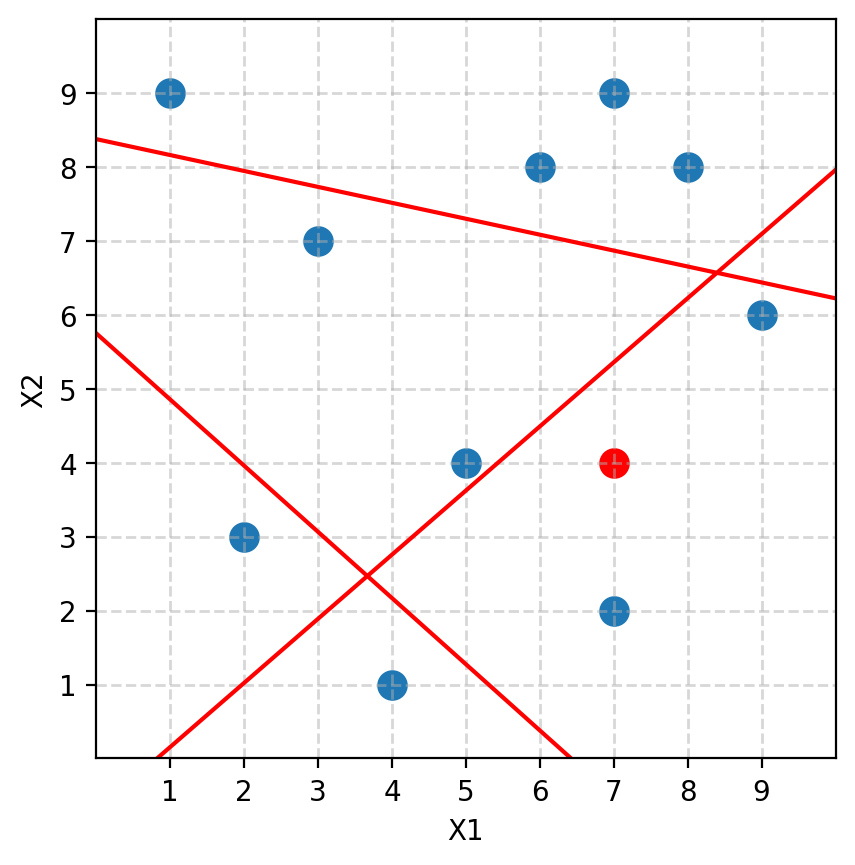

In [132]:
hyperplanes = generate_hyperplanes(X)
plot_hyperplanes(hyperplanes)
plot_dataset()
plt.xlim(0, 10)
plt.ylim(0, 10)

In [133]:
def compute_signs(hyperplanes, X, d):
    hash_table = {}
    for j in X:
        signs1=[]
        for i in hyperplanes:
            a = i[:d]
            b=  i[d]
            signs = np.sign(np.dot(j, a) + b)
            signs1.append(signs)
        hash_table[tuple(j)] = signs1
    return hash_table

In [134]:
hash_table = compute_signs(hyperplanes, X, 2)

In [135]:
hash_table

{(1, 9): [1.0, -1.0, 1.0],
 (2, 3): [-1.0, -1.0, -1.0],
 (4, 1): [-1.0, 1.0, -1.0],
 (3, 7): [1.0, -1.0, -1.0],
 (5, 4): [1.0, -1.0, -1.0],
 (6, 8): [1.0, -1.0, 1.0],
 (7, 2): [1.0, 1.0, -1.0],
 (8, 8): [1.0, -1.0, 1.0],
 (7, 9): [1.0, -1.0, 1.0],
 (9, 6): [1.0, 1.0, -1.0]}

In [170]:
def nearest_neighbours(hash_table, query_pt,hyperplanes,d):
    signs1=[]
    
    for i in hyperplanes:
            a = i[:d]
            b = i[d]
            signs = np.sign(np.dot(query_pt, a) + b)
            signs1.append(signs)
            #print(signs1)
    key_list=[]
    sno=[]
    
    for index, (key, value) in enumerate(hash_table.items()):
        #print(index,key,value)
        if value == signs1:
            #find the index of the value
            #print("found")
            sno.append(index)
            key_list.append(key)
    
    return np.array(key_list), np.array(sno)

In [137]:
X_new, y_try = nearest_neighbours(hash_table,[7,2.5],hyperplanes,2)

In [138]:
X_new

array([[7, 2],
       [9, 6]])

In [139]:
query_pt.shape

(2,)

In [142]:
Y = np.array([1,0,1])

naive_KNN(X_new, query_pt, 1, Y)


(array([0], dtype=int64), array([[7, 2]]), array([2.]), 1)

In [143]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

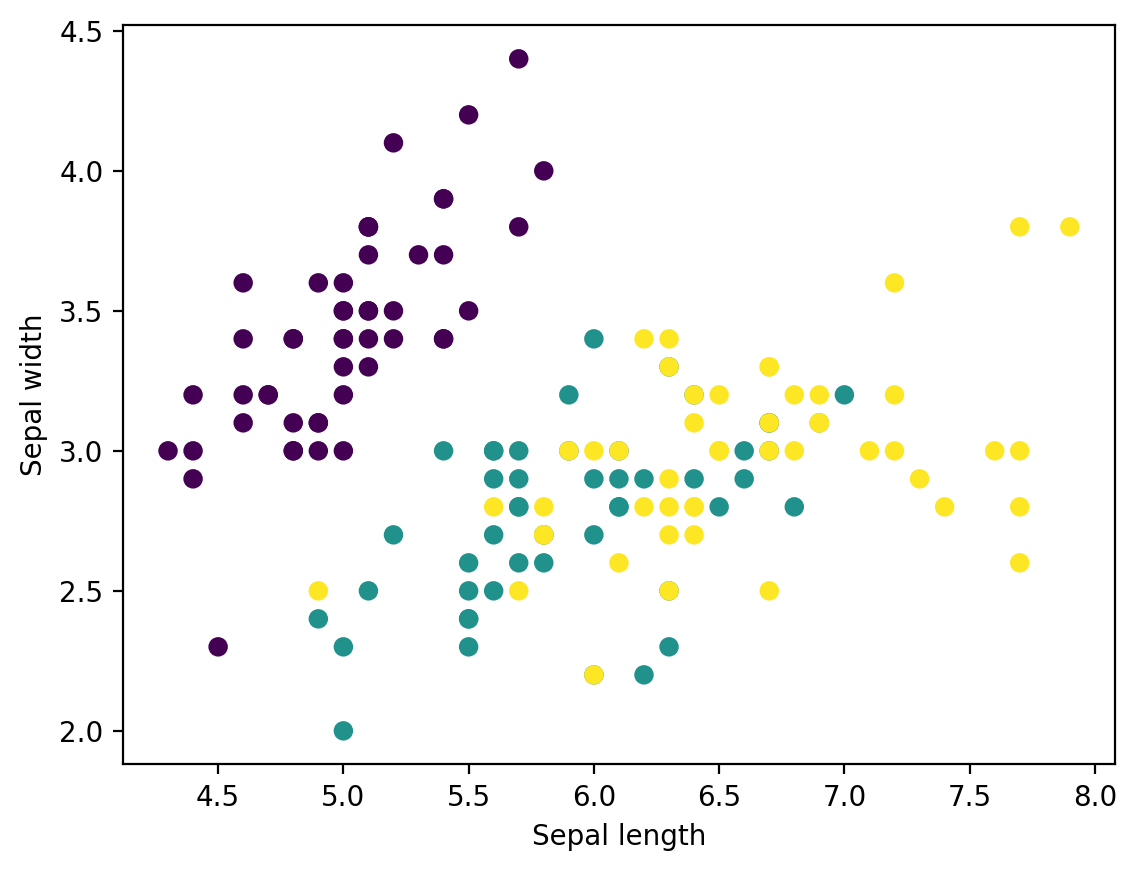

In [144]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [145]:
X=X[:,:2]


In [146]:
hyperplanes = generate_hyperplanes(X)

(2.0, 5.0)

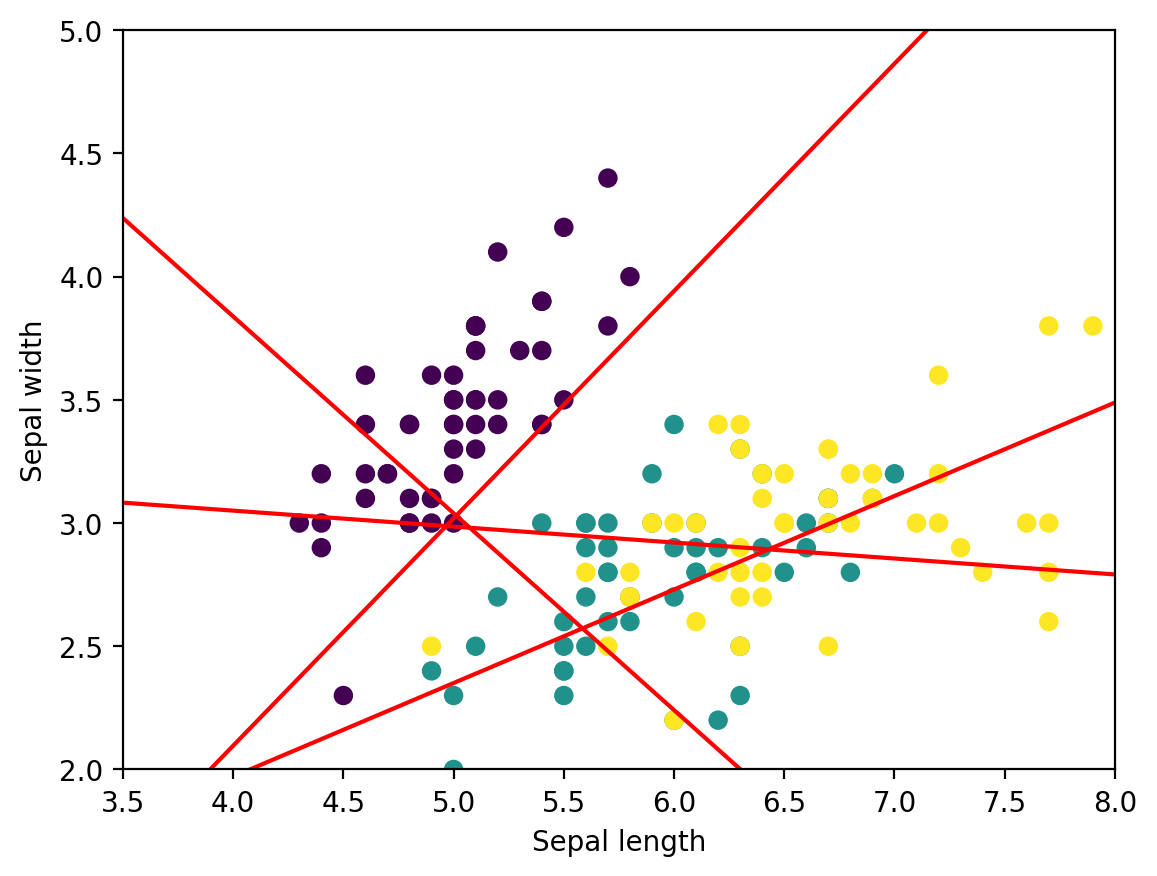

In [147]:
plot_hyperplanes(hyperplanes)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(3.5, 8)
plt.ylim(2, 5)

In [168]:
def lsh_train(X):
    d = X.shape[1]
    hyperplanes = generate_hyperplanes(X)
    hash_table  = compute_signs(hyperplanes, X, d)
    return hash_table, hyperplanes

In [173]:
def lsh_test(hash_table, query_pt, hyperplanes, d, y, k=1):
    X_sub, y_try = nearest_neighbours(hash_table, query_pt, hyperplanes, d)
    #check if y_try is empty
    if len(y_try)==0:
        return naive_KNN(X, query_pt, k, np.array(y))
    else:
        classes=[]
        for i in y_try:
            # print(y[i])
            classes.append(y[i])
        classes=np.array(classes)
    return naive_KNN(X_sub, query_pt, k, classes)

In [150]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

In [155]:
hash_tab, hyperplanes = lsh_train(X)

(0.0, 10.0)

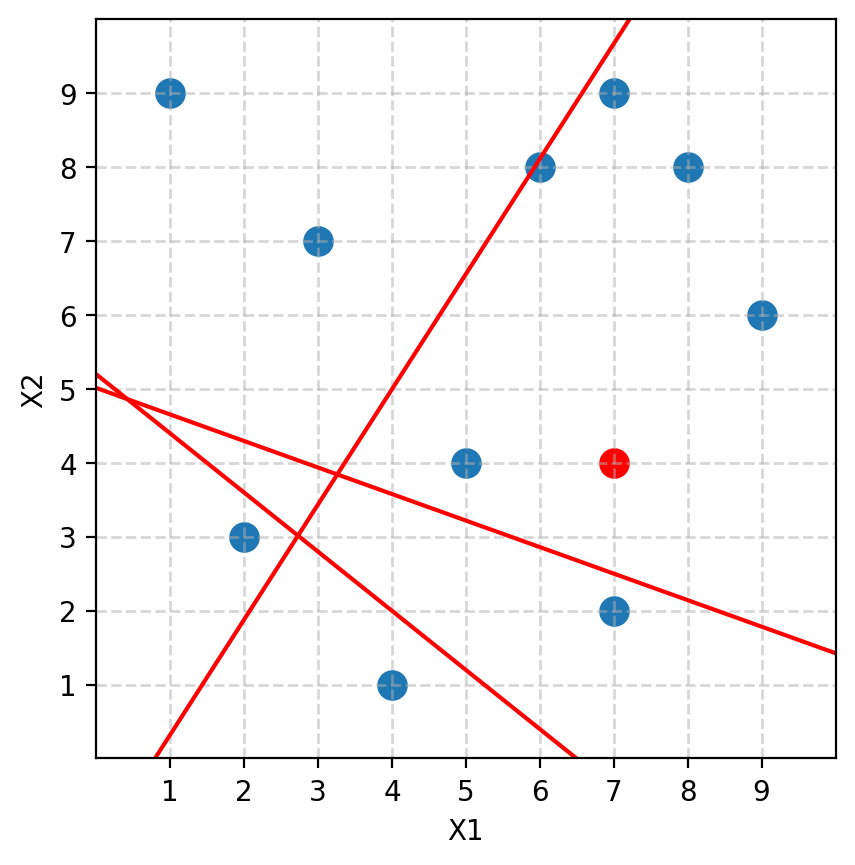

In [156]:
plot_hyperplanes(hyperplanes)
plot_dataset()
plt.xlim(0, 10)
plt.ylim(0, 10)

In [161]:
lsh_test(hash_tab, [1,5], hyperplanes, [1,0,1,0,1,0,1,0,1,0])

(array([1], dtype=int64), array([[3, 7]]), array([2.82842712]), 0)

# Comparison 

In [68]:
%pip install memory-profiler

In [174]:
import numpy as np
import time
import memory_profiler
import gc

k = 11  # Number of nearest neighbors to consider

# Function to generate data
def generate_data(N, D):
    return np.random.rand(N, D)

# Function to measure time and memory
def measure(func, data, y, query_pt):

    if func == "naive":
        gc.disable()

        start_time = time.time()
        mem_usage_before = memory_profiler.memory_usage()[0]
        result = naive_KNN(data, query_pt, k, y)
        mem_usage_after = memory_profiler.memory_usage()[0]
        end_time = time.time()

        gc.enable()
        return "-", "-", end_time - start_time, mem_usage_after - mem_usage_before, result
    
    if func == "KD_tree":
        gc.disable()

        train_start_time = time.time()
        train_mem_usage_before = memory_profiler.memory_usage()[0]
        KD = KD_tree(data, y, k)
        train_mem_usage_after = memory_profiler.memory_usage()[0]
        train_end_time = time.time()

        test_start_time = time.time()
        test_mem_usage_before = memory_profiler.memory_usage()[0]
        result = KD.predict_class(query_pt)
        test_mem_usage_after = memory_profiler.memory_usage()[0]
        test_end_time = time.time()

        gc.enable()
        return train_end_time - train_start_time, train_mem_usage_after - train_mem_usage_before, test_end_time - test_start_time, test_mem_usage_after - test_mem_usage_before, result

    if func == "LSH":
        gc.disable()

        train_start_time = time.time()
        train_mem_usage_before = memory_profiler.memory_usage()[0]
        hash_table, hyperplanes = lsh_train(data)
        train_mem_usage_after = memory_profiler.memory_usage()[0]
        train_end_time = time.time()

        test_start_time = time.time()
        test_mem_usage_before = memory_profiler.memory_usage()[0]
        result = lsh_test(hash_table, query_pt, hyperplanes, data.shape[1], y, k)
        test_mem_usage_after = memory_profiler.memory_usage()[0]
        test_end_time = time.time()

        gc.enable()
        return train_end_time - train_start_time, train_mem_usage_after - train_mem_usage_before, test_end_time - test_start_time, test_mem_usage_after - test_mem_usage_before, result

# Results storage
results_naive = []
results_kdtree = []
results_lsh = []

# Varying dataset size and dimensions
for N in range(1000, 10001, 1000):
    print(N)
    for D in range(10, 101, 10):
        data = generate_data(N, D)
        y = np.random.randint(0, 2, N)
        query_pt = np.random.rand(D)

        for model_name in ["naive", "KD_tree", "LSH"]:
            
            train_time, train_memory, test_time, test_memory, _ = measure(model_name, data, y, query_pt)

            if model_name == "naive":
                results_naive.append((N, D, model_name, train_time, train_memory, test_time, test_memory))
            
            elif model_name == "KD_tree":
                results_kdtree.append((N, D, model_name, train_time, train_memory, test_time, test_memory))

            elif model_name == "LSH":
                results_lsh.append((N, D, model_name, train_time, train_memory, test_time, test_memory))

1000


KeyboardInterrupt: 

In [87]:
avg_test_time_N_naive = {}
avg_test_memory_N_naive = {}

for i in range(0, len(results_naive), 10):
    interval_results = results_naive[i:i+10]

    average_time = sum([result[-2] for result in interval_results]) / len(interval_results)
    avg_test_time_N_naive[interval_results[0][0]] = average_time

    positive_results = [result[-1] for result in interval_results if result[-1] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_memory_N_naive[interval_results[0][0]] = average_memory

# avg_test_time_N_naive , avg_memory_N_naive

avg_test_time_D_naive = {}
avg_test_memory_D_naive = {}

for i in range(0, 10):
    interval_results = results_naive[i:100:10]

    average_time = sum([result[-2] for result in interval_results]) / len(interval_results)
    avg_test_time_D_naive[interval_results[0][1]] = average_time

    positive_results = [result[-1] for result in interval_results if result[-1] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_memory_D_naive[interval_results[0][1]] = average_memory

# avg_test_time_D_naive, avg_memory_D_naive


In [90]:
avg_train_time_N_kdtree = {}
avg_train_memory_N_kdtree = {}
avg_test_time_N_kdtree = {}
avg_test_memory_N_kdtree = {}

for i in range(0, len(results_kdtree), 10):
    interval_results = results_kdtree[i:i+10]

    average_time = sum([result[-4] for result in interval_results]) / len(interval_results)
    avg_train_time_N_kdtree[interval_results[0][0]] = average_time

    positive_results = [result[-3] for result in interval_results if result[-3] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_train_memory_N_kdtree[interval_results[0][0]] = average_memory

    average_time = sum([result[-2] for result in interval_results]) / len(interval_results)
    avg_test_time_N_kdtree[interval_results[0][0]] = average_time

    positive_results = [result[-1] for result in interval_results if result[-1] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_test_memory_N_kdtree[interval_results[0][0]] = average_memory

# avg_train_time_N_kdtree , avg_train_memory_N_kdtree , avg_test_time_N_kdtree , avg_test_memory_N_kdtree

avg_train_time_D_kdtree = {}
avg_train_memory_D_kdtree = {}
avg_test_time_D_kdtree = {}
avg_test_memory_D_kdtree = {}

for i in range(0, 10):
    interval_results = results_kdtree[i:100:10]

    average_time = sum([result[-4] for result in interval_results]) / len(interval_results)
    avg_train_time_D_kdtree[interval_results[0][1]] = average_time

    positive_results = [result[-3] for result in interval_results if result[-3] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_train_memory_D_kdtree[interval_results[0][1]] = average_memory

    average_time = sum([result[-2] for result in interval_results]) / len(interval_results)
    avg_test_time_D_kdtree[interval_results[0][1]] = average_time

    positive_results = [result[-1] for result in interval_results if result[-1] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_test_memory_D_kdtree[interval_results[0][1]] = average_memory

# avg_train_time_D_kdtree , avg_train_memory_D_kdtree , avg_test_time_D_kdtree , avg_test_memory_D_kdtree

In [ ]:
avg_train_time_N_lsh = {}
avg_train_memory_N_lsh = {}
avg_test_time_N_lsh = {}
avg_test_memory_N_lsh = {}

for i in range(0, len(results_lsh), 10):
    interval_results = results_lsh[i:i+10]

    average_time = sum([result[-4] for result in interval_results]) / len(interval_results)
    avg_train_time_N_lsh[interval_results[0][0]] = average_time

    positive_results = [result[-3] for result in interval_results if result[-3] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_train_memory_N_lsh[interval_results[0][0]] = average_memory

    average_time = sum([result[-2] for result in interval_results]) / len(interval_results)
    avg_test_time_N_lsh[interval_results[0][0]] = average_time

    positive_results = [result[-1] for result in interval_results if result[-1] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_test_memory_N_lsh[interval_results[0][0]] = average_memory

# avg_train_time_N_lsh , avg_train_memory_N_lsh , avg_test_time_N_lsh , avg_test_memory_N_lsh

avg_train_time_D_lsh = {}
avg_train_memory_D_lsh = {}
avg_test_time_D_lsh = {}
avg_test_memory_D_lsh = {}

for i in range(0, 10):
    interval_results = results_lsh[i:100:10]

    average_time = sum([result[-4] for result in interval_results]) / len(interval_results)
    avg_train_time_D_lsh[interval_results[0][1]] = average_time

    positive_results = [result[-3] for result in interval_results if result[-3] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_train_memory_D_lsh[interval_results[0][1]] = average_memory

    average_time = sum([result[-2] for result in interval_results]) / len(interval_results)
    avg_test_time_D_lsh[interval_results[0][1]] = average_time

    positive_results = [result[-1] for result in interval_results if result[-1] >= 0]
    average_memory = sum(positive_results) / len(positive_results) if positive_results else 0
    avg_test_memory_D_lsh[interval_results[0][1]] = average_memory

# avg_train_time_D_lsh , avg_train_memory_D_lsh , avg_test_time_D_lsh , avg_test_memory_D_lsh

In [105]:
import matplotlib.pyplot as plt
import inspect

def plot_dicts(dicts, dict_names, x, y):
    """
    Plot values from multiple dictionaries against the common keys.
    
    Args - dicts: List of dictionaries with same keys.
    """
    # Get the keys from the first dictionary
    keys = list(dicts[0].keys())
    
    # Plot the values from each dictionary
    for i, d in enumerate(dicts):
        values = list(d.values())
        label = list(d.keys())[0]
        plt.plot(keys, values, label=dict_names[i])
    
    # Add legend and labels
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    
    # Show the plot
    plt.show()

## Plots

In [ ]:
plot_dicts([avg_train_time_N_kdtree, avg_test_time_N_lsh], ["avg_train_time_N_kdtree", "avg_test_time_N_lsh"], "N", "Time (in s)")

In [ ]:
plot_dicts([avg_train_memory_N_kdtree, avg_train_memory_N_lsh], ["avg_train_memory_N_kdtree", "avg_train_memory_N_lsh"], "N", "Memory (in MiB)")

In [ ]:
plot_dicts([avg_train_time_D_kdtree, avg_test_time_D_lsh], ["avg_train_time_D_kdtree", "avg_test_time_D_lsh"], "D", "Time (in s)")

In [ ]:
plot_dicts([avg_train_memory_D_kdtree, avg_train_memory_D_lsh], ["avg_train_memory_D_kdtree", "avg_train_memory_D_lsh"], "D", "Memory (in MiB)")

In [ ]:
plot_dicts([avg_test_time_N_naive, avg_test_time_N_kdtree, avg_test_time_N_lsh], ["avg_test_time_N_naive", "avg_test_time_N_kdtree", "avg_test_time_N_lsh"], "N", "Time (in s)")

In [ ]:
plot_dicts([avg_test_memory_N_naive, avg_test_memory_N_kdtree, avg_test_memory_N_lsh], ["avg_test_memory_N_naive", "avg_test_memory_N_kdtree", "avg_test_memory_N_lsh"], "N", "Memory (in MiB)")

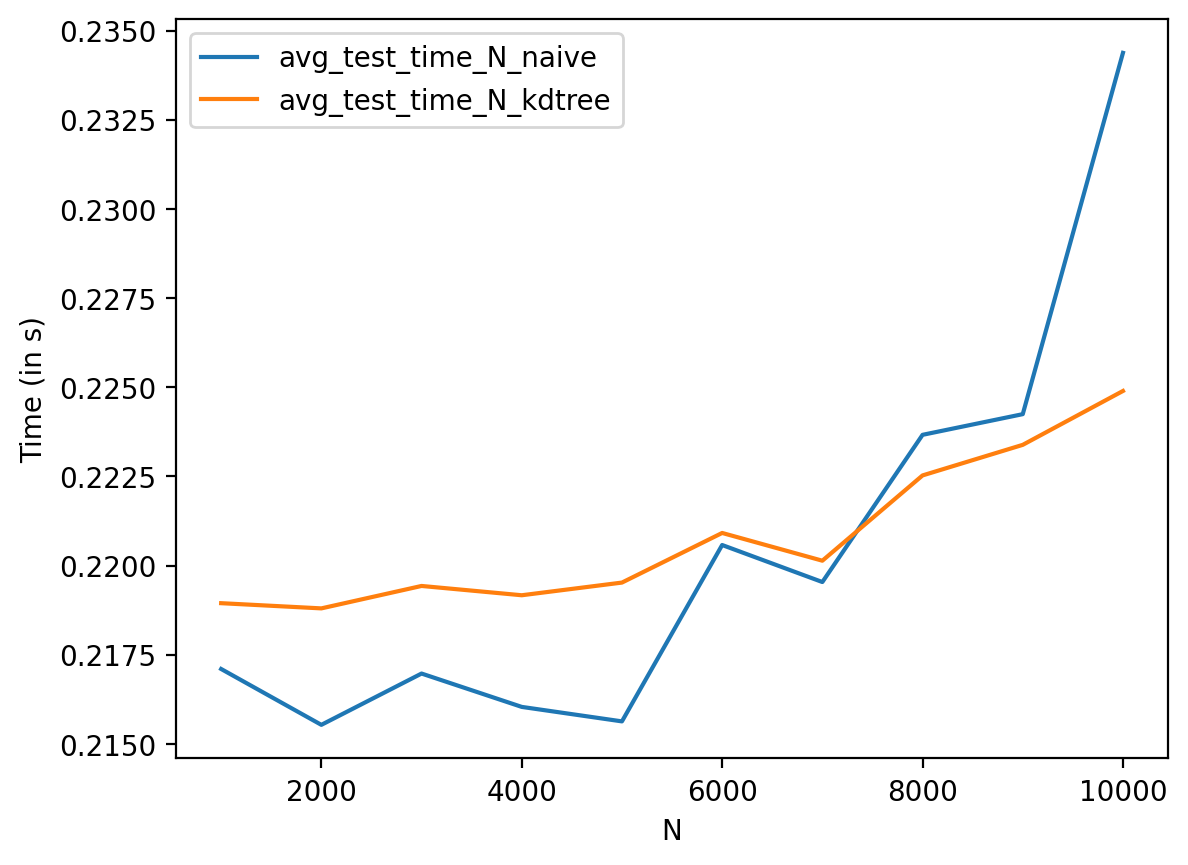

In [107]:
plot_dicts([avg_test_time_D_naive, avg_test_time_D_kdtree, avg_test_time_D_lsh], ["avg_test_time_D_naive", "avg_test_time_D_kdtree", "avg_test_time_D_lsh"], "D", "Time (in s)")

In [ ]:
plot_dicts([avg_test_memory_D_naive, avg_test_memory_D_kdtree, avg_test_memory_D_lsh], ["avg_test_memory_D_naive", "avg_test_memory_D_kdtree", "avg_test_memory_D_lsh"], "D", "Memory (in MiB)")

# Classification

In [175]:
def plot_decision_boundary(model, X, Y, k):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Initialize Z to be an empty array of the same shape as xx
    Z = np.empty(xx.shape)

    if model == "kdtree":
        d = KD_tree(X,Y,k)
    elif model == "lsh":
        hash_table, hyperplanes = lsh_train(X)

    # Loop over each point in the grid
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            # Get the x and y coordinates of the point
            x = xx[i, j]
            y = yy[i, j]
            
            # Make a prediction for the point
            if model == "naive":
                _,_,_, c = naive_KNN(X, np.array([x, y]), k, Y)
                Z[i, j] = c
            elif model == "kdtree":
                Z[i, j] = d.predict_class(np.array([x, y]))
            elif model == "lsh":
                Z[i, j] = lsh_test(hash_table, query_pt, hyperplanes, X.shape[1], y, k)
    
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, cmap='viridis')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_26672\1090626585.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


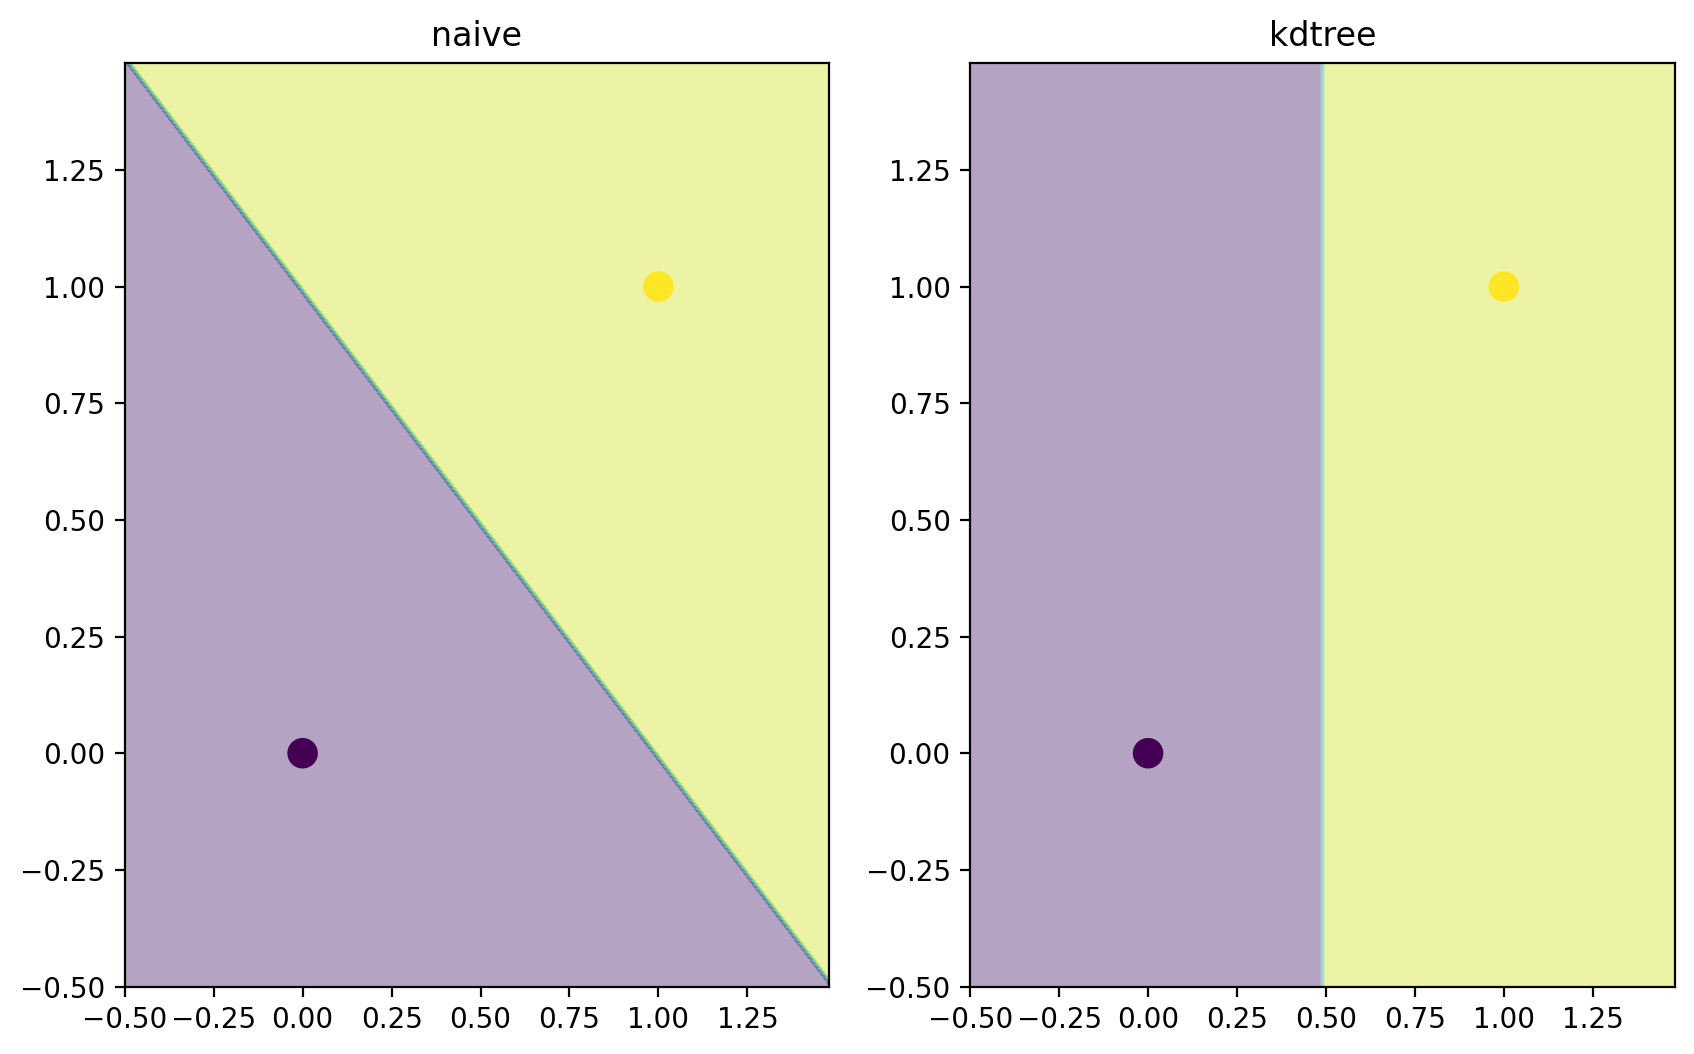

In [117]:
X = np.array([[0, 0], [1, 1]])
y = np.array([0, 1])

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')

for i, model in enumerate(["naive","kdtree"]):
    plt.subplot(1, 2, i + 1)
    plot_decision_boundary(model, X, y, 1)
    plt.title(model)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_26672\356036910.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


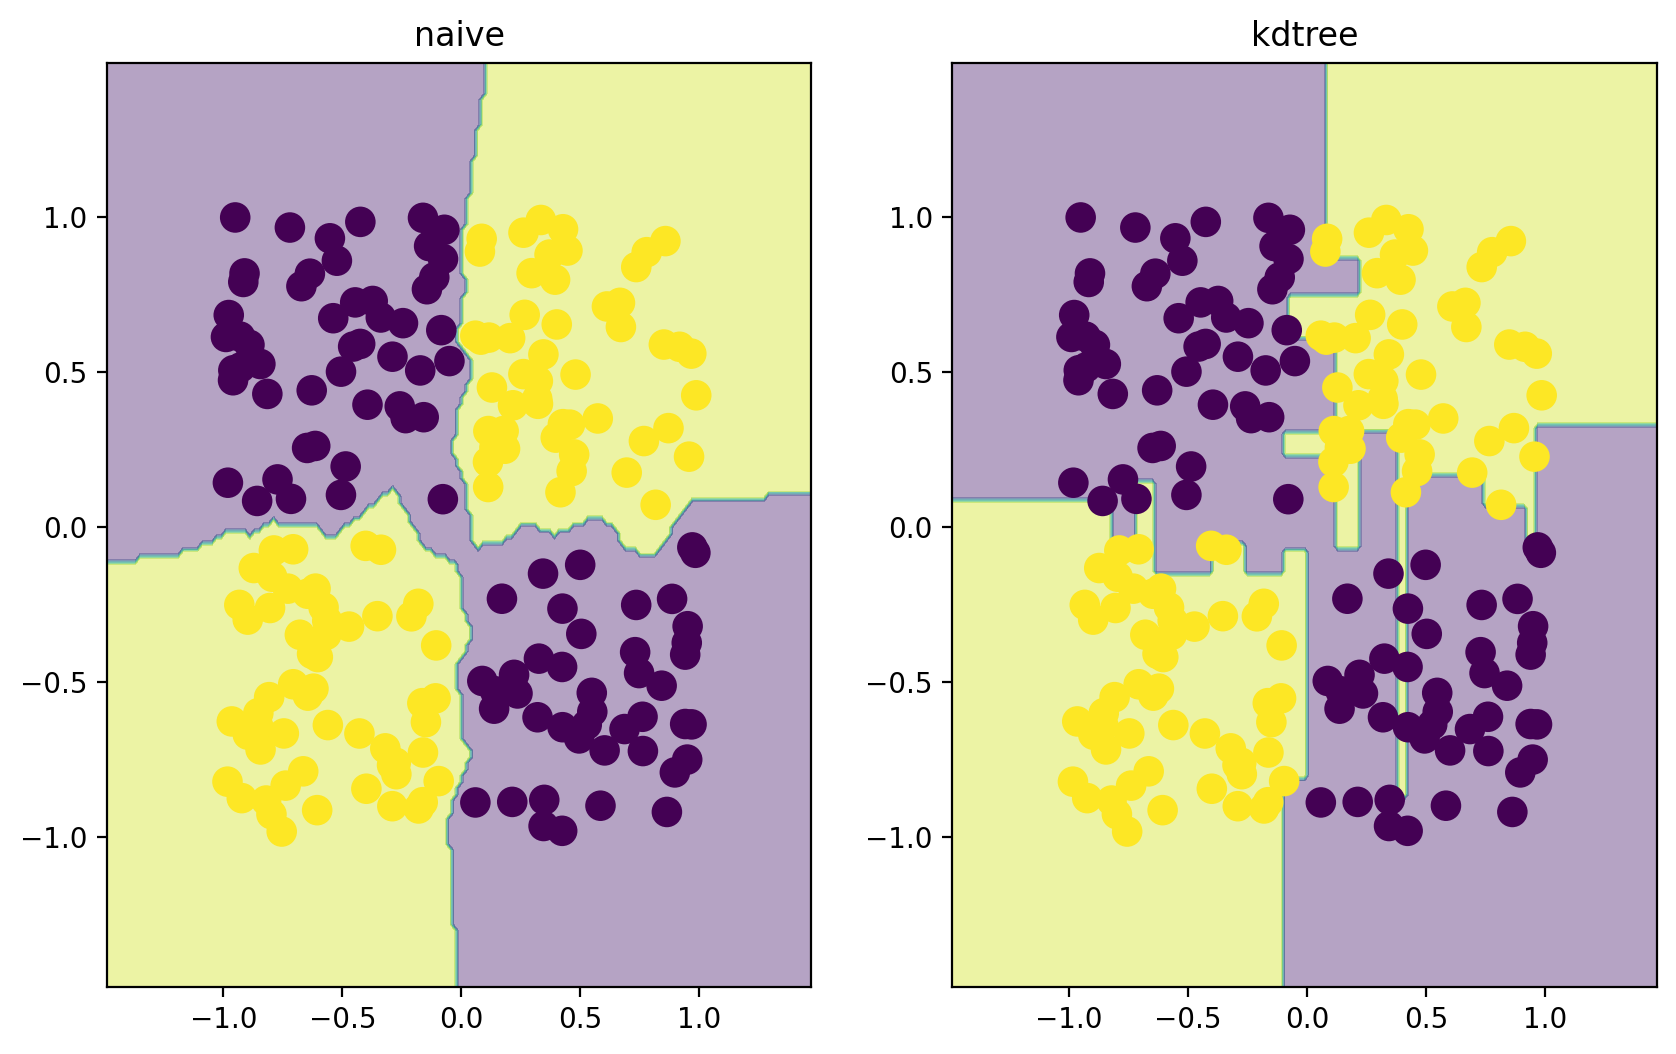

In [118]:
def generate_random_xor_dataset(num_instances):
    # Generate random values for x1 and x2 in the range (-1, 1)
    X = np.random.uniform(-0.95, 0.95, size=(num_instances, 2))
    X_shifted = X + np.where(X >= 0, 0.05, -0.05)

    # Compute target labels based on the sign of x1 * x2
    y = np.where(np.prod(X_shifted, axis=1) > 0, 1, 0)

    return X_shifted, y

X_train, y_train = generate_random_xor_dataset(200)

plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='viridis')

for i, model in enumerate(["naive","kdtree"]):
    plt.subplot(1, 2, i + 1)
    plot_decision_boundary(model, X_train, y_train, 1)
    plt.title(model)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_26672\2872472502.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


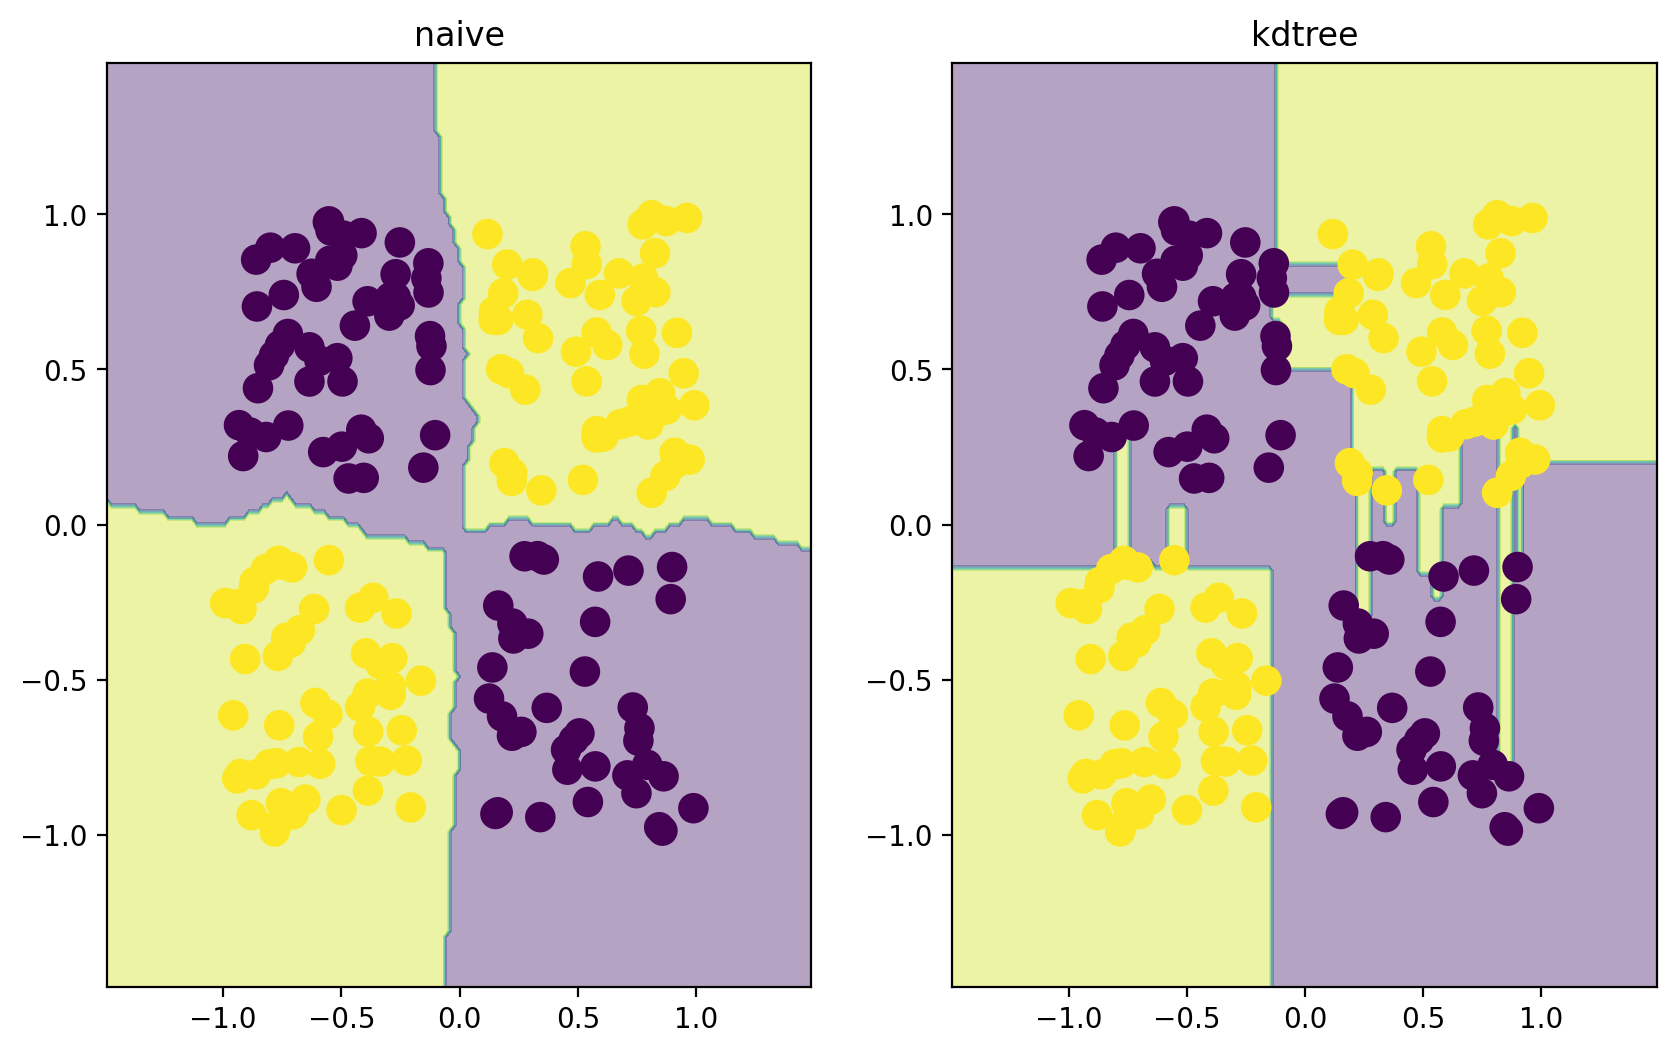

In [119]:
def generate_random_xor_dataset(num_instances):
    # Generate random values for x1 and x2 in the range (-1, 1)
    X = np.random.uniform(-0.9, 0.9, size=(num_instances, 2))
    X_shifted = X + np.where(X >= 0, 0.1, -0.1)

    # Compute target labels based on the sign of x1 * x2
    y = np.where(np.prod(X_shifted, axis=1) > 0, 1, 0)

    return X_shifted, y

X_train, y_train = generate_random_xor_dataset(200)

plt.figure(figsize=(10, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='viridis')

for i, model in enumerate(["naive","kdtree"]):
    plt.subplot(1, 2, i + 1)
    plot_decision_boundary(model, X_train, y_train, 1)
    plt.title(model)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_26672\942657.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


Depth: 0 Median: 5.5 Axis: 0
Depth: 1 Median: 4 Axis: 1
Depth: 2 Median: 3.0 Axis: 0
Depth: 3 - No Split Possible
Depth: 3 - No Split Possible
Depth: 2 Median: 7 Axis: 1
Depth: 3 - No Split Possible
Depth: 3 Median: 2.0 Axis: 0
Depth: 4 - No Split Possible
Depth: 4 - No Split Possible
Depth: 1 Median: 8 Axis: 1
Depth: 2 Median: 8.0 Axis: 0
Depth: 3 - No Split Possible
Depth: 3 - No Split Possible
Depth: 2 Median: 7 Axis: 0
Depth: 3 - No Split Possible
Depth: 3 Median: 8.5 Axis: 1
Depth: 4 - No Split Possible
Depth: 4 - No Split Possible


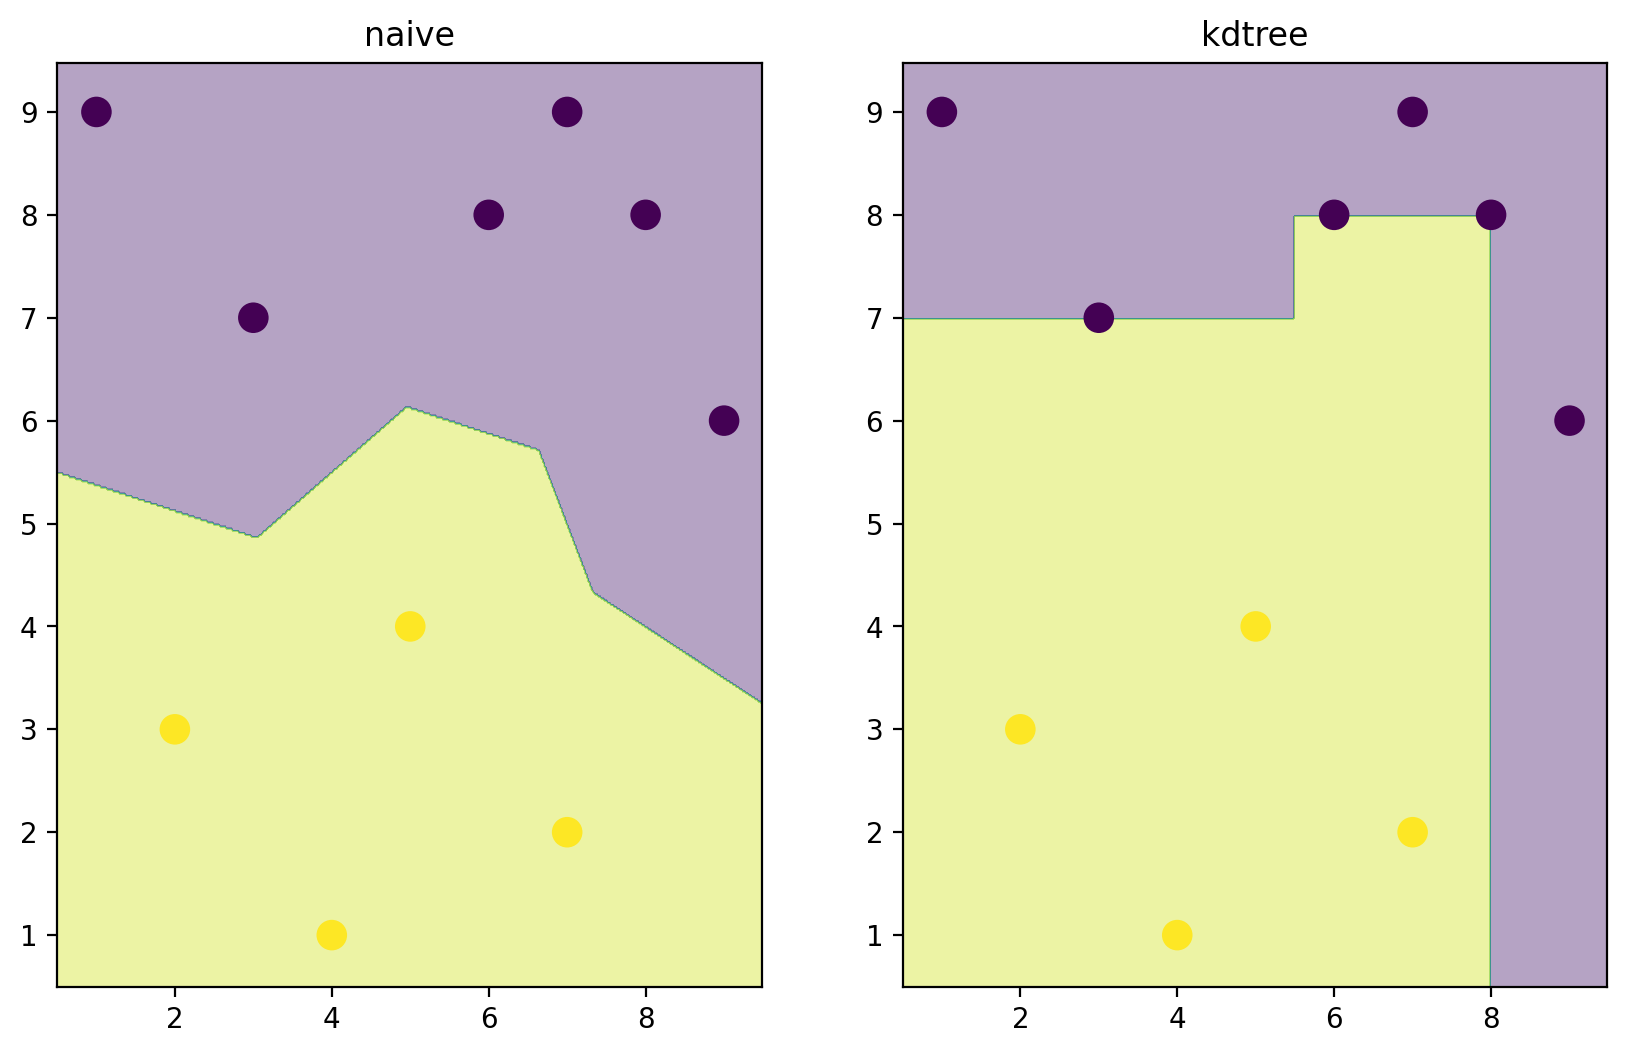

In [123]:
X = np.array([[2,3],[4,1],[1,9],[3,7],[5,4],[7,2],[9,6],[6,8],[7,9],[8,8]])
y = np.array([1,1,0,0,1,1,0,0,0,0])

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')

for i, model in enumerate(["naive","kdtree"]):
    plt.subplot(1, 2, i + 1)
    plot_decision_boundary(model, X, y, 1)
    plt.title(model)